Importações

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Renomeando os dados

In [6]:

arquivo = "pam_ibge.csv"

pam_ibge = pd.read_csv(arquivo)

pam_ibge.head(2)


,NC,NN,MN,V,D1C,D1N,D2N,D3N,D4N
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [7]:
pam_ibge.columns

Index(['NC', 'NN', 'MN', 'V', 'D1C', 'D1N', 'D2N', 'D3N', 'D4N'], dtype='object')

In [8]:
pam_ibge.rename(columns={'NC': 'Nível Territorial (Código)', 'NN': 'Nível Territorial', 'MN': 'Unidade de Medida', 'V':'Valor', 'D1C': 'Município (Código)', 'D1N': 'Município', 'D2N': 'Variável', 'D3N': 'Ano', 'D4N':'Produto das lavouras temporárias e permanentes'}, inplace=True)
pam_ibge.head(2)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [9]:
pam_ibge.columns

Index(['Nível Territorial (Código)', 'Nível Territorial', 'Unidade de Medida',
       'Valor', 'Município (Código)', 'Município', 'Variável', 'Ano',
       'Produto das lavouras temporárias e permanentes'],
      dtype='object')

Alterando o tipos de dados

In [10]:
pam_ibge.dtypes

Nível Territorial (Código)                         int64
Nível Territorial                                 object
Unidade de Medida                                 object
Valor                                             object
Município (Código)                                 int64
Município                                         object
Variável                                          object
Ano                                                int64
Produto das lavouras temporárias e permanentes    object
dtype: object

In [11]:
pam_ibge["Nível Territorial (Código)"] = (pam_ibge["Nível Territorial (Código)"].astype(str))
pam_ibge["Valor"] = pd.to_numeric(pam_ibge["Valor"], errors="coerce")
pam_ibge["Município (Código)"] = (pam_ibge["Município (Código)"].astype(str))
pam_ibge["Município"] = (pam_ibge["Município"].astype(str))
pam_ibge['Ano'] = pam_ibge['Ano'].astype(int)


In [12]:
pam_ibge.dtypes

Nível Territorial (Código)                         object
Nível Territorial                                  object
Unidade de Medida                                  object
Valor                                             float64
Município (Código)                                 object
Município                                          object
Variável                                           object
Ano                                                 int64
Produto das lavouras temporárias e permanentes     object
dtype: object

In [13]:
pam_ibge.head(10)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate
2,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacaxi*
3,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Açaí
4,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alfafa fenada
5,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão arbóreo (em caroço)
6,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão herbáceo (em caroço)
7,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alho
8,6,Município,Hectares,4000.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Amendoim (em casca)
9,6,Município,Hectares,10.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Arroz (em casca)


Evolução anual dos produtos de lavouras temporárias e permantes em Toneladas da CATI - Coordenadoria de Assistência Técnica Integral (Regional Tupã)

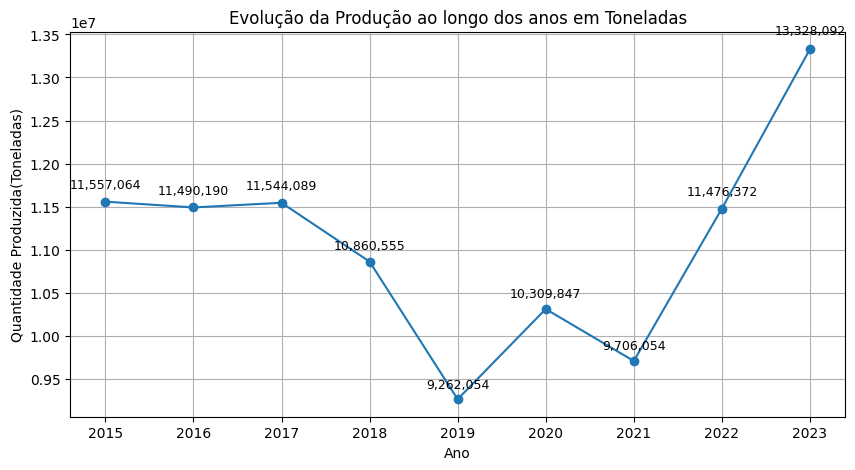

In [14]:
evolucao = pam_ibge.groupby("Ano")["Valor"].sum()
plt.figure(figsize=(10,5))
plt.plot(evolucao.index, evolucao.values, marker = 'o')
plt.title("Evolução da Produção ao longo dos anos em Toneladas")
plt.xlabel("Ano")
plt.ylabel("Quantidade Produzida(Toneladas)")
plt.grid(True)

for x, y in zip(evolucao.index, evolucao.values):
    plt.text(x , y + y*0.01, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)


plt.show()

In [15]:

#Validação
# Soma por ano
soma_por_ano = pam_ibge.groupby("Ano")["Valor"].sum().reset_index()
print(soma_por_ano)

# Total geral
total_geral = pam_ibge["Valor"].sum()
print(f"Total geral: {total_geral:,.0f}")


    Ano       Valor
0  2015  11557064.0
1  2016  11490190.0
2  2017  11544089.0
3  2018  10860555.0
4  2019   9262054.0
5  2020  10309847.0
6  2021   9706054.0
7  2022  11476372.0
8  2023  13328092.0
Total geral: 99,534,317


Top 10 produtos das Lavouras de todos os municipios

In [16]:
qutd_produzida1 = pam_ibge[pam_ibge["Variável"] == "Quantidade produzida"]
prod_agrupados = qutd_produzida1.groupby("Produto das lavouras temporárias e permanentes")["Valor"].sum().sort_values(ascending=False)
prod_agrupados.head(10)


Produto das lavouras temporárias e permanentes
Cana-de-açúcar            50324099.0
Mandioca                   1207930.0
Amendoim (em casca)         712722.0
Milho (em grão)             165060.0
Melancia                    116675.0
Soja (em grão)              102370.0
Mamão                        69473.0
Batata-doce                  59275.0
Abacate                      45494.0
Café (em grão) Arábica       44376.0
Name: Valor, dtype: float64

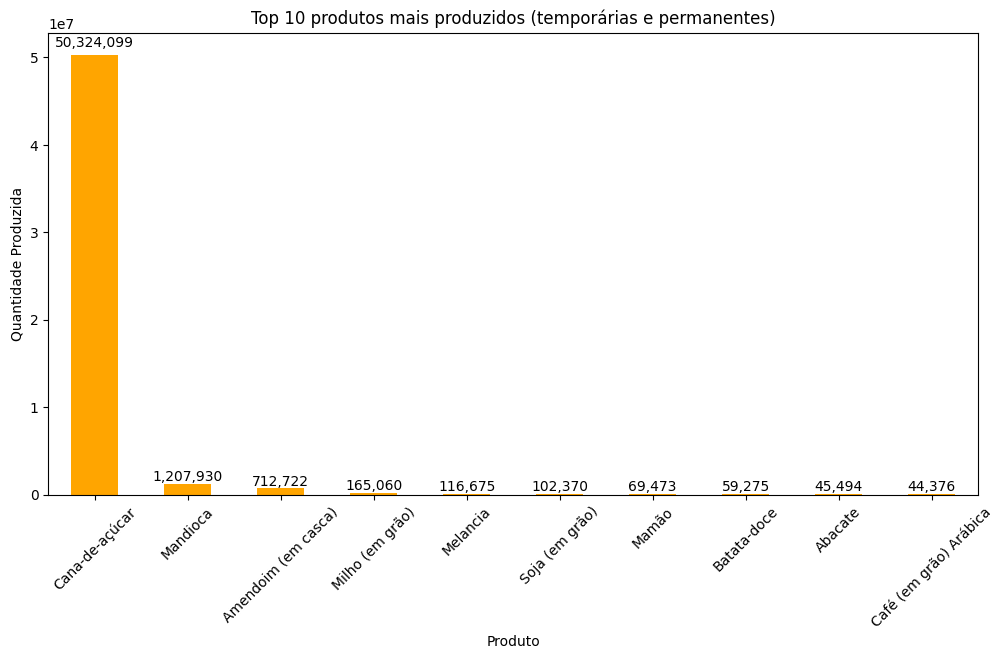

In [17]:

ax = prod_agrupados.head(10).plot(
    kind="bar",
    figsize=(12,6),
    color="orange",
    title="Top 10 produtos mais produzidos (temporárias e permanentes)"
)

plt.ylabel("Quantidade Produzida")
plt.xlabel("Produto")
plt.xticks(rotation=45)

# Adicionar os valores no topo das barras
for i, v in enumerate(prod_agrupados.head(10)):
    ax.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom')

plt.show()


Top 5 municipios da Regional que tem mais produção em Cana-de-açucar, Mandioca, Amendoim(em casca)

In [18]:
#Filtrando para pegar somemte Cana-de-açucar, Mandioca e Amendoim em Toneladas 
produtos_lavouras = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"])) &
    (pam_ibge["Variável"] == "Quantidade produzida")]

# Agrupar por município e somar os valores
lavouras_agrupadas = produtos_lavouras.groupby("Município")["Valor"].sum().reset_index()
# Selecionar os 5 maiores produtores em Toneladas 
top5 = lavouras_agrupadas.nlargest(5, "Valor")
print(top5)


           Município      Valor
2   Herculândia (SP)  7289654.0
13         Tupã (SP)  6405644.0
9       Queiroz (SP)  6035664.0
7       Parapuã (SP)  5543271.0
3         Iacri (SP)  5311887.0


In [19]:
#validando os produtos da lavouras (Cana, Mandioca e Amendoim)
Cafe = qutd_produzida1[qutd_produzida1["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"])]
soma = Cafe.groupby("Município")["Valor"].sum().sort_values(ascending=False)
unidade = Cafe["Unidade de Medida"].iloc[0]
print("A soma é:", soma, "A unidade de medida:", unidade)


A soma é: Município
Herculândia (SP)        7289654.0
Tupã (SP)               6405644.0
Queiroz (SP)            6035664.0
Parapuã (SP)            5543271.0
Iacri (SP)              5311887.0
Lucélia (SP)            4911301.0
Salmourão (SP)          3436575.0
Arco-Íris (SP)          3113681.0
Sagres (SP)             2494096.0
Osvaldo Cruz (SP)       2223252.0
Rinópolis (SP)          1875295.0
Inúbia Paulista (SP)    1829038.0
Bastos (SP)             1383688.0
Pracinha (SP)            391705.0
Name: Valor, dtype: float64 A unidade de medida: Toneladas


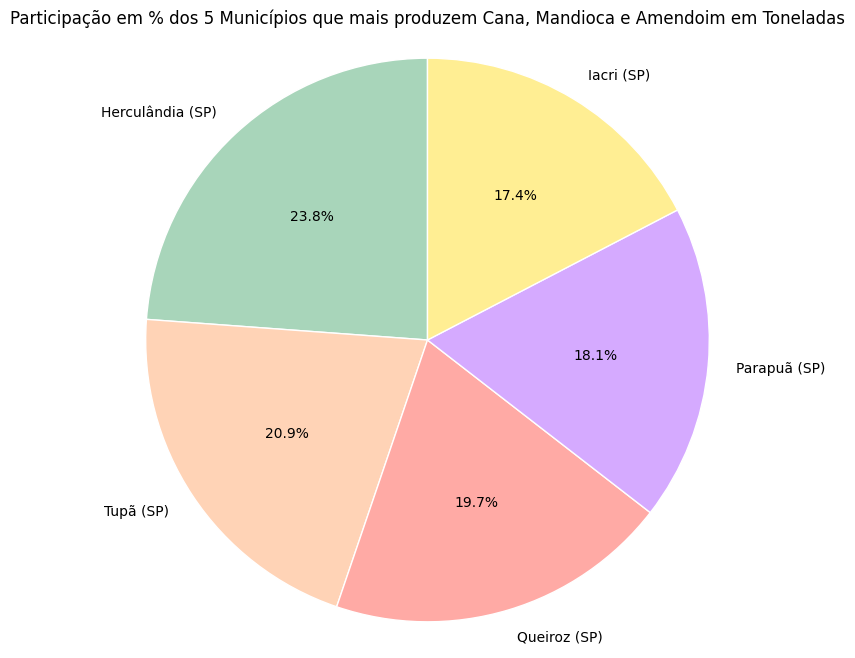

In [20]:
#plotando o gráfico
# Dados
labels = top5["Município"]
sizes = top5["Valor"]

# Paleta de cores suaves
colors = ["#A8D5BA", "#FFD3B6", "#FFAAA5", "#D5AAFF", "#FFEE93"]  # tons pastel

# Criar gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}  # borda branca entre fatias
)
plt.title("Participação em % dos 5 Municípios que mais produzem Cana, Mandioca e Amendoim em Toneladas")
plt.axis("equal")
plt.show()


Produtividade e eficiência: Área plantada x Rendimento médio

In [21]:

#filtrando, pegando somente "Cana-de-açúcar", "Mandioca", "Amendoim (em casca)" dentro da variavel Produto das lavouras temporárias e permanentes
produtos_lavouras = pam_ibge[(pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"]))]

#Separando a area plantada e rendimento medio
area_plantada = pam_ibge[pam_ibge["Variável"] == "Área plantada ou destinada à colheita"]["Valor"].astype(float)
rendimento_medio = pam_ibge[pam_ibge["Variável"] == "Rendimento médio da produção"]["Valor"].astype(float)

#renomeando
df_produtividade = produtos_lavouras.pivot_table(
    index="Município",
    columns="Variável",
    values="Valor"
).reset_index()

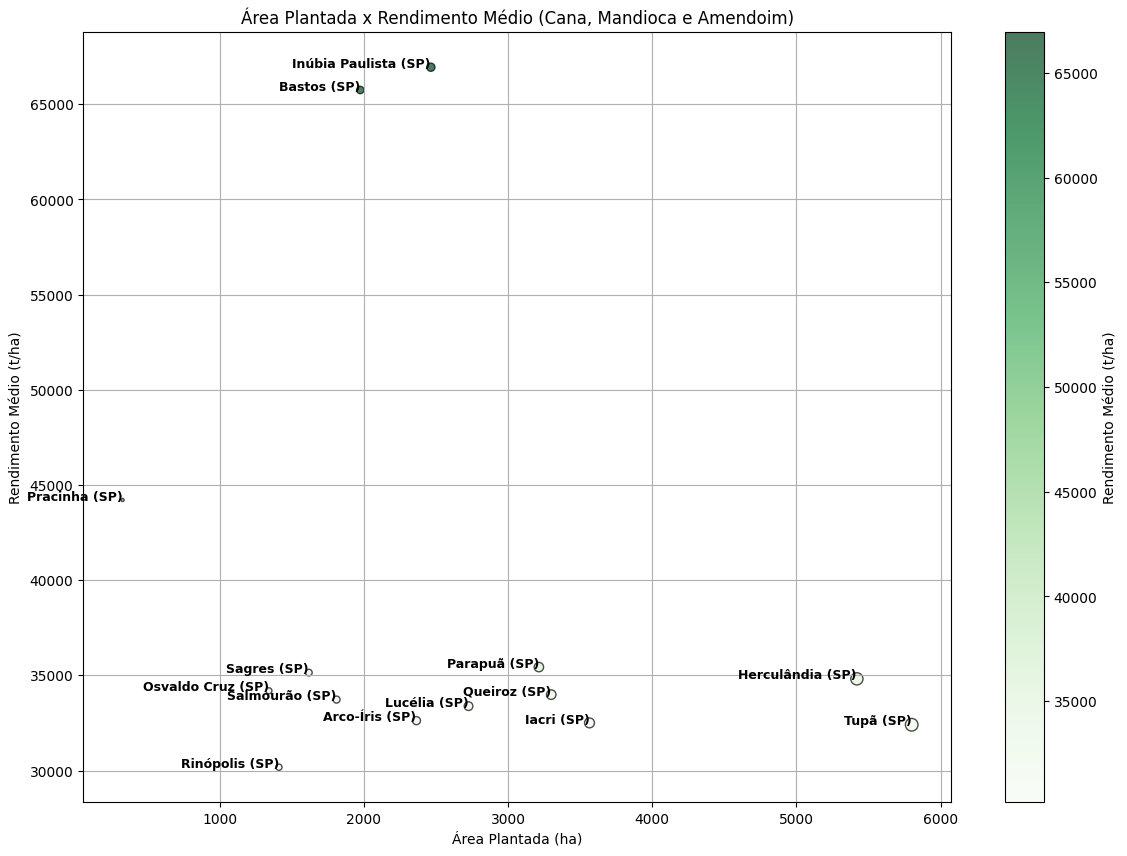

In [22]:
plt.figure(figsize=(14,10))

# Tamanho e cor dos pontos
sizes = df_produtividade["Área plantada ou destinada à colheita"] / 70 #tamanho dos pontos no grafico
colors = df_produtividade["Rendimento médio da produção"]

scatter = plt.scatter(
    df_produtividade["Área plantada ou destinada à colheita"],
    df_produtividade["Rendimento médio da produção"],
    s=sizes,
    c=colors,
    cmap="Greens",
    alpha=0.7,
    edgecolors="black"
)#o SCATTER é utilizado para gráfico de dispersão, monstra a relação entre duas váriaveis, plotando cada observação no gráfico. 

# Adicionar legenda de cores
cbar = plt.colorbar(scatter)
cbar.set_label("Rendimento Médio (t/ha)")

plt.title("Área Plantada x Rendimento Médio (Cana, Mandioca e Amendoim)")
plt.xlabel("Área Plantada (ha)")
plt.ylabel("Rendimento Médio (t/ha)")
plt.grid(True)

# Adicionar nomes dos 14 municipios 
top_municipios = df_produtividade.nlargest(14, "Área plantada ou destinada à colheita")

for i, row in top_municipios.iterrows():
    plt.text(
        row["Área plantada ou destinada à colheita"],
        row["Rendimento médio da produção"],
        row["Município"],
        fontsize=9,
        weight="bold",
        ha="right"
    )

plt.show()

#entendendo o Gráfico: os Municipios mais a direita como Tupã e Herculândia são os que possuem maior área plantada e também são os maiores produtores
#já os municipios que estão mais acima no no gráfico tem maior produtividade por hectare


Valor econômico: Quais culturas tiveram um gasto de produção maior na Regional ?

In [23]:
#Valor da produção
valo_produzido = pam_ibge[(pam_ibge["Unidade de Medida"] == "Mil Reais") & (pam_ibge["Produto das lavouras temporárias e permanentes"] != "Total")]
prod_agrupados2 = valo_produzido.groupby("Produto das lavouras temporárias e permanentes")["Valor"].sum().sort_values(ascending=False)
prod_agrupados2.head(14)


Produto das lavouras temporárias e permanentes
Cana-de-açúcar                4384498.0
Amendoim (em casca)           1961575.0
Mandioca                       837548.0
Café (em grão) Arábica         360717.0
Café (em grão) Total           360717.0
Soja (em grão)                 188708.0
Milho (em grão)                162483.0
Borracha (látex coagulado)     102804.0
Melancia                       101465.0
Mamão                           76120.0
Batata-doce                     75687.0
Maracujá                        73374.0
Abacate                         67264.0
Banana (cacho)                  50783.0
Name: Valor, dtype: float64

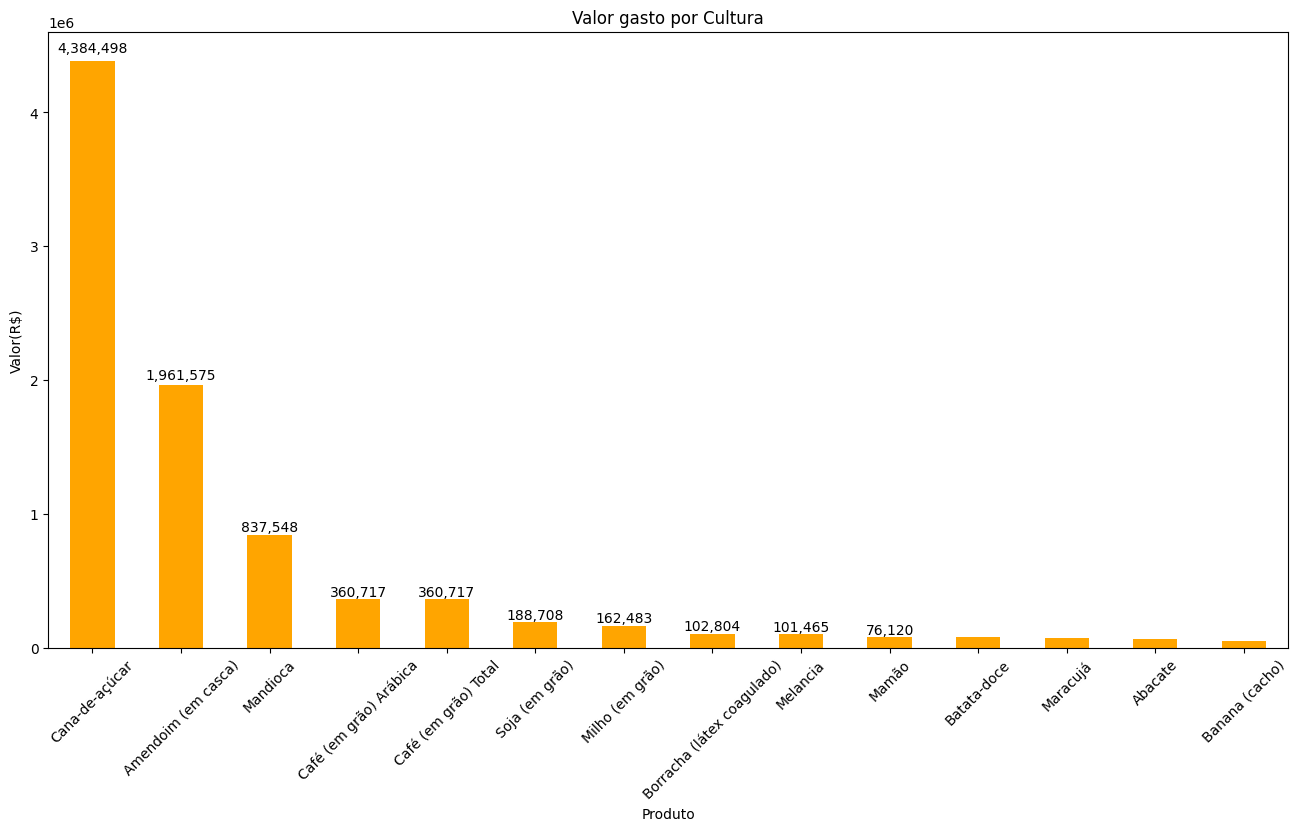

In [24]:

ax = prod_agrupados2.head(14).plot(
    kind="bar",
    figsize=(16,8),
    color="orange",
    title="Valor gasto por Cultura"
)

plt.ylabel("Valor(R$)")
plt.xlabel("Produto")
plt.xticks(rotation=45)

# Adicionar os valores no topo das barras
for i, v in enumerate(prod_agrupados2.head(10)):
    ax.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom')

plt.show()


Estimativa de Lucro nos 14 municípios da Regional, Cana-de-açúcar, Amendoim e Mandioca 

In [25]:

# Quantidade produzida (em toneladas)
quantidades = prod_agrupados.iloc[:3]

# Valor da produção segundo IBGE (em R$)
valores_ibge = prod_agrupados2.iloc[:3]

# Preço médio fixo definido (R$/t)
precos_fixos = [2753, 170, 3629]  

# Criar DataFrame
df = pd.DataFrame({
    "Produto": ["Amendoim (em casca)","Cana-de-açúcar", "Mandioca"],
    "Quantidade_Produzida(t)": quantidades,
    "Valor_Producao_IBGE(R$)": valores_ibge,
    "Preco_Medio_Fixo(R$/t)": precos_fixos
})

# Corrigindo o valor do IBGE (parece que os dados estavam em milhares)
df["Valor_Producao_IBGE(R$)"] = df["Valor_Producao_IBGE(R$)"] * 1000

# Preço médio real calculado com base no IBGE
df["Preco_Medio_Real(R$/t)"] = df["Valor_Producao_IBGE(R$)"] / df["Quantidade_Produzida(t)"]

# Receita estimada com base no preço médio fixo do PAM
df["Receita_Estimada(R$)"] = df["Quantidade_Produzida(t)"] * df["Preco_Medio_Fixo(R$/t)"]

# Diferença entre receita estimada e valor do IBGE
df["Dif_Receita (Estimada - IBGE)"] = df["Receita_Estimada(R$)"] - df["Valor_Producao_IBGE(R$)"]

print(df)


                                                            Produto  \
Produto das lavouras temporárias e permanentes                        
Amendoim (em casca)                             Amendoim (em casca)   
Cana-de-açúcar                                       Cana-de-açúcar   
Mandioca                                                   Mandioca   

                                                Quantidade_Produzida(t)  \
Produto das lavouras temporárias e permanentes                            
Amendoim (em casca)                                            712722.0   
Cana-de-açúcar                                               50324099.0   
Mandioca                                                      1207930.0   

                                                Valor_Producao_IBGE(R$)  \
Produto das lavouras temporárias e permanentes                            
Amendoim (em casca)                                        1.961575e+09   
Cana-de-açúcar                             

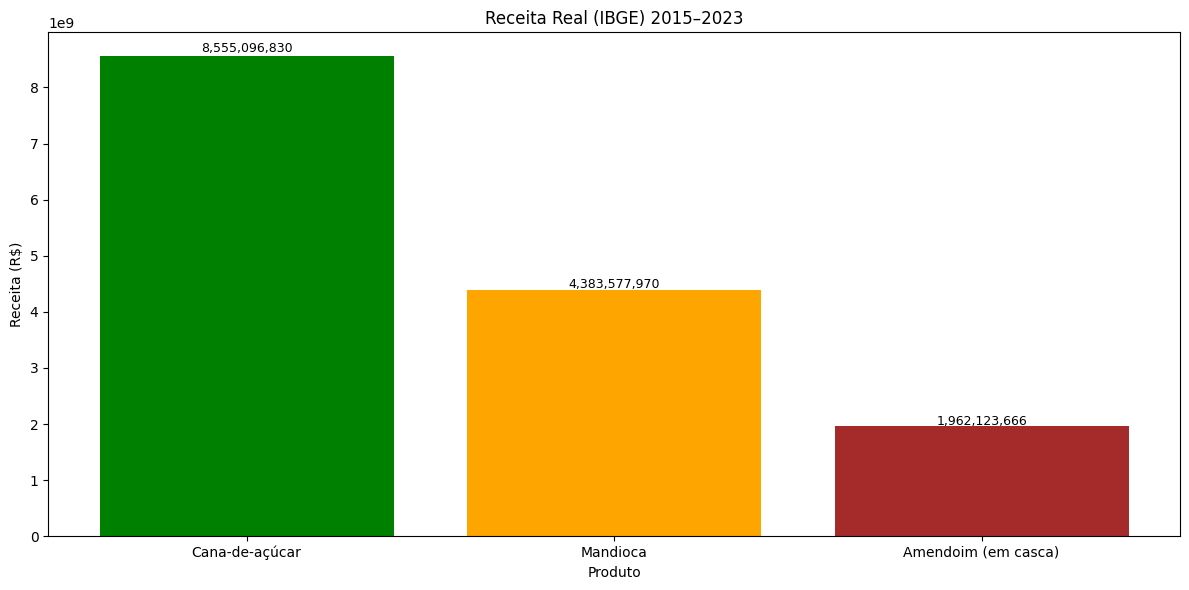

In [26]:

# Ordenar decrescente pela Receita Real (IBGE)
df_sorted = df.sort_values(by="Receita_Estimada(R$)", ascending=False)

# Dados
produtos = df_sorted["Produto"]
receita_real = df_sorted["Receita_Estimada(R$)"]

plt.figure(figsize=(12,6))
plt.bar(produtos, receita_real, color=["green", "orange", "brown"])

# Títulos e rótulos
plt.title("Receita Real (IBGE) 2015–2023")
plt.ylabel("Receita (R$)")
plt.xlabel("Produto")

# Colocar valores em cima das barras
for i, v in enumerate(receita_real):
    plt.text(i, v + (v*0.01), f"{v:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Visualização espacial(Mapas): Mapa coroplético mostrando concentração da produção da mandioca, cana e amendoim na CATI Regional de Tupã/SP.

In [27]:
# Carregar shapefile
mapa = gpd.read_file("SP_Municipios_2024/SP_Municipios_2024.shp")

# Filtrar apenas municípios do estado de São Paulo
mapa_sp = mapa[mapa["NM_UF"] == "São Paulo"]

# Lista com os 14 municípios de interesse
municipios_interesse = [
    "Inúbia Paulista", "Bastos", "Tupã", "Herculândia", "Sagres",
    "Osvaldo Cruz", "Salmourão", "Arco-Íris", "Lucélia", "Queiroz",
    "Iacri", "Parapuã", "Rinópolis", "Pracinha"
]

# Filtrar apenas os 14 municípios
mapa_14 = mapa_sp[mapa_sp["NM_MUN"].isin(municipios_interesse)]

print(mapa_14[["NM_MUN", "NM_UF"]])


              NM_MUN      NM_UF
5          Salmourão  São Paulo
10      Osvaldo Cruz  São Paulo
29           Lucélia  São Paulo
55            Sagres  São Paulo
56             Iacri  São Paulo
79          Pracinha  São Paulo
109  Inúbia Paulista  São Paulo
226      Herculândia  São Paulo
377        Rinópolis  São Paulo
421          Parapuã  São Paulo
430             Tupã  São Paulo
497           Bastos  São Paulo
512          Queiroz  São Paulo
605        Arco-Íris  São Paulo


In [28]:
print(mapa_sp.columns)


Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'SIGLA_UF', 'CD_REGIA', 'NM_REGIA', 'SIGLA_RG', 'CD_CONCU',
       'NM_CONCU', 'AREA_KM2', 'geometry'],
      dtype='object')


<Axes: >

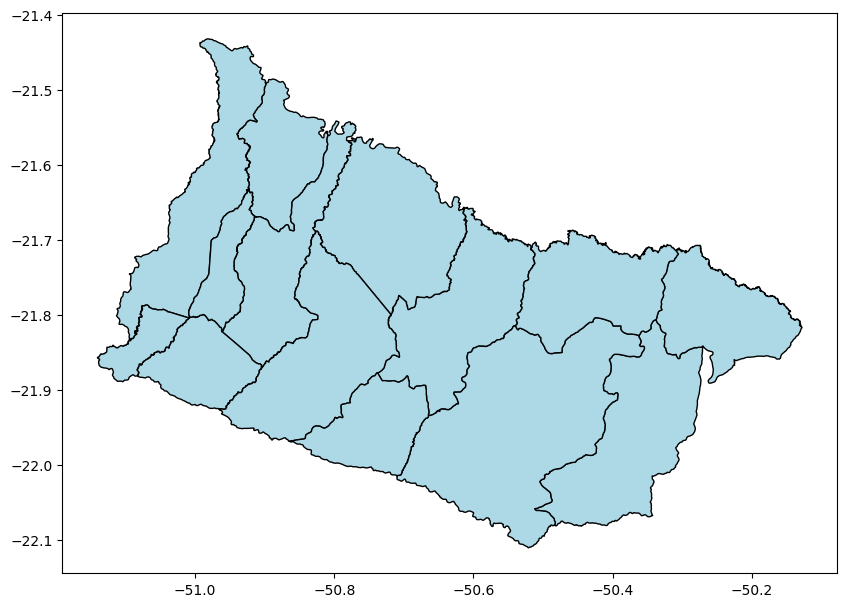

In [29]:
mapa_14.plot(figsize=(10, 8), edgecolor="black", color="lightblue")

In [30]:
# Converter para string e garantir 7 dígitos
mapa["CD_MUN"] = mapa["CD_MUN"].astype(str).str.zfill(7)
pam_ibge["Município (Código)"] = pam_ibge["Município (Código)"].astype(str).str.zfill(7)

# Merge pelo código do município
gdf_pam = mapa.merge(
    pam_ibge,
    left_on="CD_MUN",
    right_on="Município (Código)",
    how="inner"
)

print(gdf_pam.shape)


(45360, 25)


In [38]:
#validando a quantidade produzida e o ano
cana = qutd_produzida1[
    (qutd_produzida1["Produto das lavouras temporárias e permanentes"] == "Cana-de-açúcar") &
    (qutd_produzida1["Ano"] == 2015)
]

# Somar por município
soma = cana.groupby("Município")["Valor"].sum().sort_values(ascending=False)

# Capturar unidade (se for sempre a mesma)
unidade = cana["Unidade de Medida"].iloc[0] if not cana.empty else None

print("A soma é:")
print(soma)
print("A unidade de medida:", unidade)
print("Ano: 2023")


A soma é:
Município
Tupã (SP)               885000.0
Queiroz (SP)            717225.0
Herculândia (SP)        704700.0
Iacri (SP)              588300.0
Lucélia (SP)            571500.0
Arco-Íris (SP)          506775.0
Parapuã (SP)            465500.0
Salmourão (SP)          396750.0
Rinópolis (SP)          340125.0
Sagres (SP)             293250.0
Osvaldo Cruz (SP)       283500.0
Inúbia Paulista (SP)    255000.0
Bastos (SP)             165000.0
Pracinha (SP)            34230.0
Name: Valor, dtype: float64
A unidade de medida: Toneladas
Ano: 2023


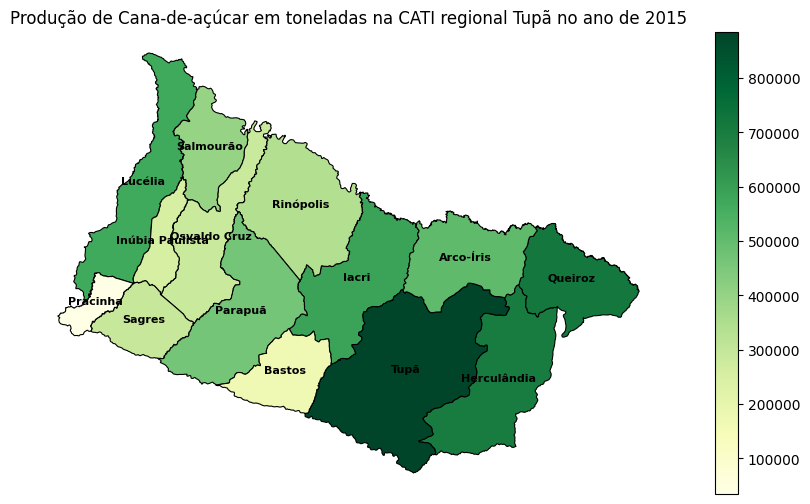

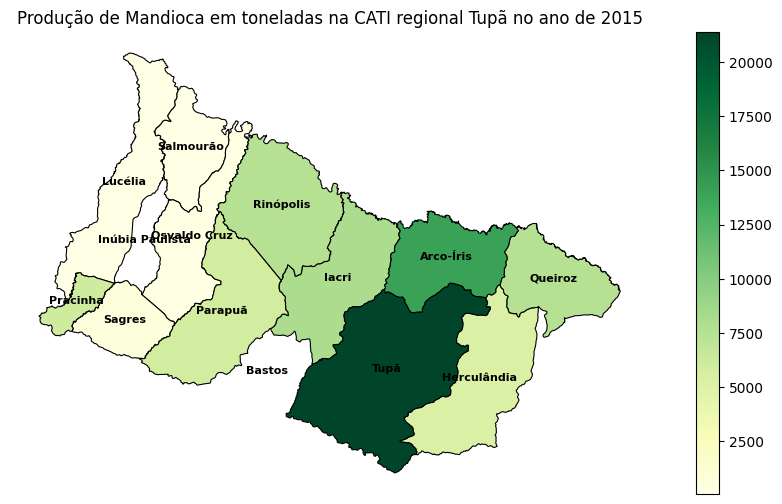

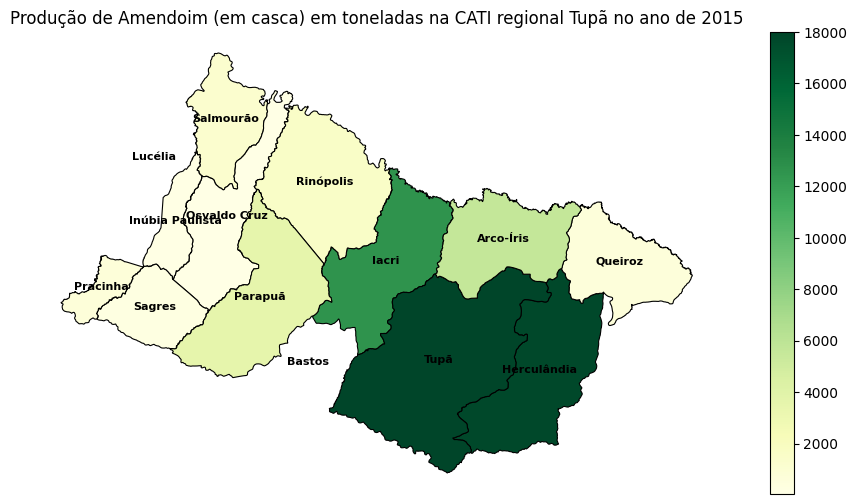

In [43]:

# Lista com os 14 municípios de interesse
municipios_interesse = [
    "Inúbia Paulista", "Bastos", "Tupã", "Herculândia", "Sagres",
    "Osvaldo Cruz", "Salmourão", "Arco-Íris", "Lucélia", "Queiroz",
    "Iacri", "Parapuã", "Rinópolis", "Pracinha"
]

# 1. Filtrar somente os 14 municípios
gdf_14 = gdf_pam[gdf_pam["NM_MUN"].isin(municipios_interesse)]

# 2. Filtrar apenas as culturas desejadas e o ano mais recente (exemplo: 2023)
culturas = ["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"]
gdf_14_culturas = gdf_14[
    (gdf_14["Produto das lavouras temporárias e permanentes"].isin(culturas)) &
    (gdf_14["Ano"] == 2015) &
    (gdf_14["Variável"] == "Quantidade produzida")
]

# 3. Plotar mapa coroplético para cada cultura
for cultura in culturas:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Filtrar a cultura
    gdf_plot = gdf_14_culturas[gdf_14_culturas["Produto das lavouras temporárias e permanentes"] == cultura]
    
    # Plotar mapa
    gdf_plot.plot(
        column="Valor",
        cmap="YlGn", #mudar a cora da barra 
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax
    )
    
    # Adicionar nomes dos municípios no centróide
    for idx, row in gdf_plot.iterrows():
        centroid = row["geometry"].centroid
        ax.annotate(
            text=row["NM_MUN"],
            xy=(centroid.x, centroid.y),
            ha="center",
            fontsize=8,
            color="black",
            weight="bold"
        )
    
    ax.set_title(f"Produção de {cultura} em toneladas na CATI regional Tupã no ano de 2015", fontsize=12)
    plt.axis("off")
    plt.show()
